# Nearest Centroid Classification

The following example illustrates the nearest centroid classification algorithm on a number of different data sets.

In [1]:
# uncomment these lines to pip-install required dependencies
# !pip install matplotlib
# !pip install numpy

# imports for plotting, numerical operations
import matplotlib.pylab as pl
import numpy as np
from numpy.random import multivariate_normal as mvn
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
pl.rcParams['figure.figsize'] = (3.0, 3.0)

## Data Generation Functions

The following functions generate 
- two class data set with spherical covariance (uncorrelated data)
- two class data set with non-spherical covariance (correlated data)
- three class data set with non-spherical covariance (correlated data)


In [2]:
def make_data_threeclass(N=90):
    mu = np.array([[0,3],[0,-3],[2,1]]).T
    C = np.array([[5.,4.],[4.,5.]])
    n_samples_per_class = int(N/3)
    X = np.hstack((
        mvn(mu[:,0],C,n_samples_per_class).T,
        mvn(mu[:,1],C,n_samples_per_class).T,
        mvn(mu[:,2],C,n_samples_per_class).T))
    labels = np.ones(n_samples_per_class, dtype=int)
    y = np.hstack((labels,2*labels,3*labels))-1
    # generates some toy data
    return X.T,y.T

def make_data_twoclass(N=100):
    # generates some toy data
    mu = np.array([[0,3],[0,-3]]).T
    n_samples_per_class = int(N/2)
    C = np.array([[5.,4.],[4.,5.]])
    X = np.hstack((
            mvn(mu[:,0],C,n_samples_per_class).T, 
            mvn(mu[:,1],C,n_samples_per_class).T
        ))
    y = np.hstack((np.zeros((n_samples_per_class)),(np.ones((n_samples_per_class)))))
    return X.T,y.T
    

def make_data_spherical(N=100):
    # generates some toy data
    mu = np.array([[0,3],[0,-3]]).T
    n_samples_per_class = int(N/2)
    C = np.eye(2)
    X = np.hstack((
        mvn(mu[:,0],C,n_samples_per_class).T, 
        mvn(mu[:,1],C,n_samples_per_class).T
    ))
    y = np.hstack((np.zeros((n_samples_per_class)),(np.ones((n_samples_per_class)))))
    return X.T,y.T


def make_plot_nclass(X,y,mu=None):
    colors = "brymcwg"
    
    if mu is not None:
        # Plot the decision boundary.
        h = .02 # stepsize in mesh
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
        Z = predict_ncc(np.c_[xx.ravel(), yy.ravel()],mu)
        Z = Z.reshape(xx.shape)
        cs = pl.contourf(xx, yy, Z, cmap=pl.cm.Paired,alpha=.6)

    # plot the data
    for class_idx, class_name in enumerate(np.unique(y)):
        idx = y == class_name
        pl.plot(X[idx, 0], X[idx, 1], colors[int(class_idx)%6]+'.')
        if mu is not None:
            pl.plot(mu[class_idx, 0],mu[class_idx, 1],colors[int(class_idx)%6]+'.',markersize=20)

    pl.axis('tight')
    pl.xlabel('$X_1$')
    pl.ylabel('$X_2$')

## Example: Plotting some artificial data

We generate 100 2D data points with different means and spherical covariance and plot the data set.

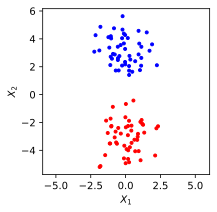

In [3]:
# generate some artificial data
X, Y = make_data_spherical()
make_plot_nclass(X,Y)
pl.axis('equal');

## Nearest Centroid Classification Algorithm

Implement the code stubs where marked with ``INSERT CODE HERE`` that perform nearest centroid classification training and prediction

In [4]:
def fit_ncc(X,Y):
    '''
    Input: 
    X samples-by-data-dimensions data matrix
    Y label vector
    
    Output: 
    mu class means stored in a number-of-classes-by-data-dimensions matrix
    '''
    # find unique classes
    cids = np.unique(Y)
    
    # compute class means
    mu = np.zeros((len(cids), X.shape[1]))
    for class_idx, class_label in enumerate(cids):
        mu[class_idx, :] = np.mean(X[Y == class_label], axis=0)
    
    return mu
    
def predict_ncc(X,mu):
    '''
    Performs neares centroid prediction
    
    Input: 
    X samples-by-data-dimensions data matrix
    mu class means stored in a number-of-classes-by-data-dimensions matrix
    
    Output:
    Y_predicted prediction as vector of length samples
    '''
    # do nearest-centroid classification
    NCdist = np.zeros((X.shape[0], mu.shape[0]))
    
    # compute euclidean distance to centroids
    for ic in np.arange(mu.shape[0]):
        NCdist[:, ic] = np.linalg.norm(X - mu[ic], axis=1)
    
    # assign the class label of the nearest (euclidean distance) centroid
    Y_predicted = NCdist.argmin(axis=1)
    
    return Y_predicted

## Nearest Centroid Classification Application Example

The following cell runs three different examples and shows the classification of the NCC classifier

If your implementation works, the below examples should be reproduced.

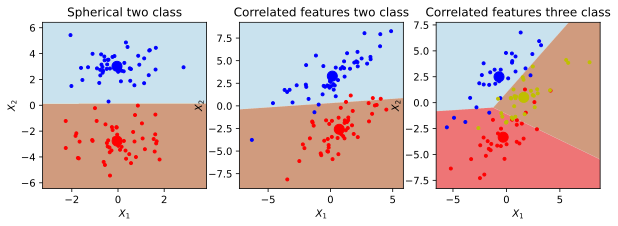

In [5]:
pl.figure(figsize=(10,3))

pl.subplot(1,3,1)
X, Y = make_data_spherical()
mu = fit_ncc(X,Y)
make_plot_nclass(X, Y, mu)
pl.title('Spherical two class')

pl.subplot(1,3,2)
X, Y = make_data_twoclass()
mu = fit_ncc(X,Y)
make_plot_nclass(X, Y, mu)
pl.title('Correlated features two class')

pl.subplot(1,3,3)
X, Y = make_data_threeclass()
mu = fit_ncc(X,Y)
make_plot_nclass(X, Y, mu)
pl.title('Correlated features three class');